In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Get the S&P 500 index data
adj_close_prices = yf.download('^GSPC', start='1990-01-01', end='2000-06-01')['Adj Close'] #start='1990-01-01', end='2024-06-01'

[*********************100%%**********************]  1 of 1 completed


# Lump Sum

In [2]:
#Calculate and show the lump sum investment strategy 
#Choose the initial investment amount
initial_investment = 50000

#Get the latest or last price value of the stock/ETF within this data set
stock_latest_value = adj_close_prices.iloc[-1]

#Get the number of shares bought on each date with the hypothetical investment amount (aka lump sum)
num_shares_bought = initial_investment / adj_close_prices

#Calculate how much money I or you would have according to the last price in this data set for
#investing a lump sum on a given date in the past
lump_sum = stock_latest_value * num_shares_bought
print('Lump Sum Investments:')
print('The best day to invest a $'+str(initial_investment)+' lump sum was on '+lump_sum.idxmax().strftime('%b %d %Y')+\
      ' and would be worth $'+str(round(lump_sum.max(), 2))+' on '+lump_sum.last_valid_index().strftime('%b %d %Y')+'.')

Lump Sum Investments:
The best day to invest a $50000 lump sum was on Oct 11 1990 and would be worth $240404.8 on May 31 2000.


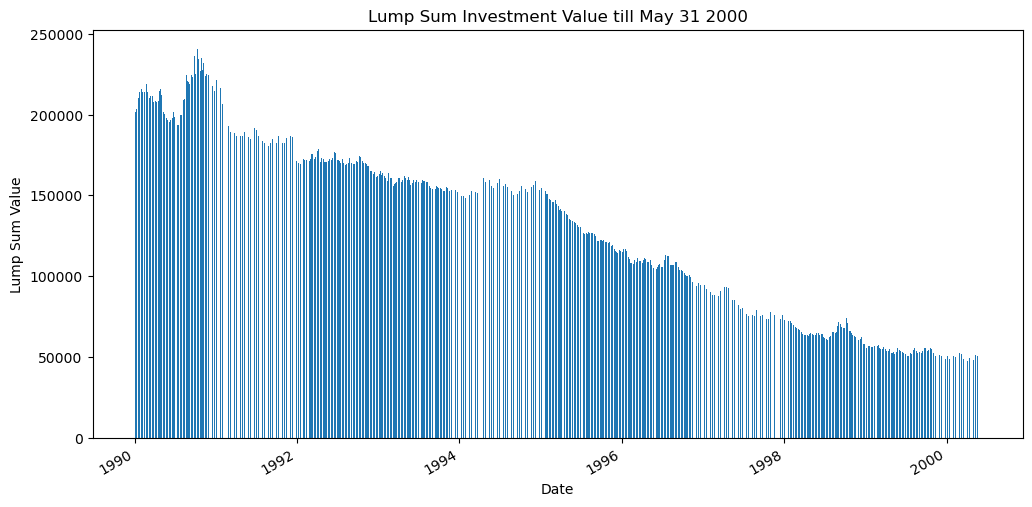

In [3]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.bar(adj_close_prices.index, lump_sum)
plt.xlabel('Date')
plt.ylabel('Lump Sum Value')
final_day = lump_sum.last_valid_index().strftime('%b %d %Y')
plt.title(f'Lump Sum Investment Value till {final_day}')

# Rotate x-axis labels for better visibility
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

# Dollar Cost Averaging

In [4]:
def DCA(start_date, initial_investment, period):
    #Get the investment periods which will be 12
    investment_date_periods = period
    
    #Calculate the portion or amount that we plan to invest for each investment date period
    investment_portion = initial_investment/ investment_date_periods
    
    #Get the dates of the investment periods
    all_investment_dates = pd.date_range(start_date, periods = investment_date_periods, freq = '30D')
    
    #Get the dates up to the last date in our data set 
    investment_dates = all_investment_dates[all_investment_dates < adj_close_prices.index[-1]]
    
    #Get the indices (and in turn the dates) within the data set that are the closest to the investment date
    closest_investment_dates = adj_close_prices.index.searchsorted(investment_dates)
    
    #Get a list of stock prices at the closest investnent date
    stock_prices = adj_close_prices.iloc[closest_investment_dates]
    
    #Get the total number of shares that we invested in by summing all of the shares purchased on each of the investment dates
    total_shares_invested = sum(investment_portion / stock_prices)

    #Get the cash that was not invested from the intitial investment amount
    uninvested_cash = investment_portion * sum(all_investment_dates >= adj_close_prices.index[-1])
    
    #Calculate the total
    total = uninvested_cash + adj_close_prices.iloc[-1] * total_shares_invested
    
    return total

In [5]:
DCA_List = []
period = 12 # 1 for lump sum
for date in adj_close_prices.index:
    DCA_List.append( DCA(date, initial_investment, period))

#Create a new dataframe
dca = pd.DataFrame()
dca['DCA'] = DCA_List

#Set the date as the index
dca = dca.set_index(pd.DatetimeIndex(adj_close_prices.index))
dca = dca.squeeze()

In [6]:
print('DCA Investments:')
print('The best day to start a DCA $'+str(initial_investment)+' investment was on '+dca.idxmax().strftime('%b %d %Y')+\
      ' and would be worth $'+str(round(dca.max(), 2))+' on '+dca.last_valid_index().strftime('%b %d %Y')+'.')

DCA Investments:
The best day to start a DCA $50000 investment was on Jan 25 1990 and would be worth $215739.31 on May 31 2000.


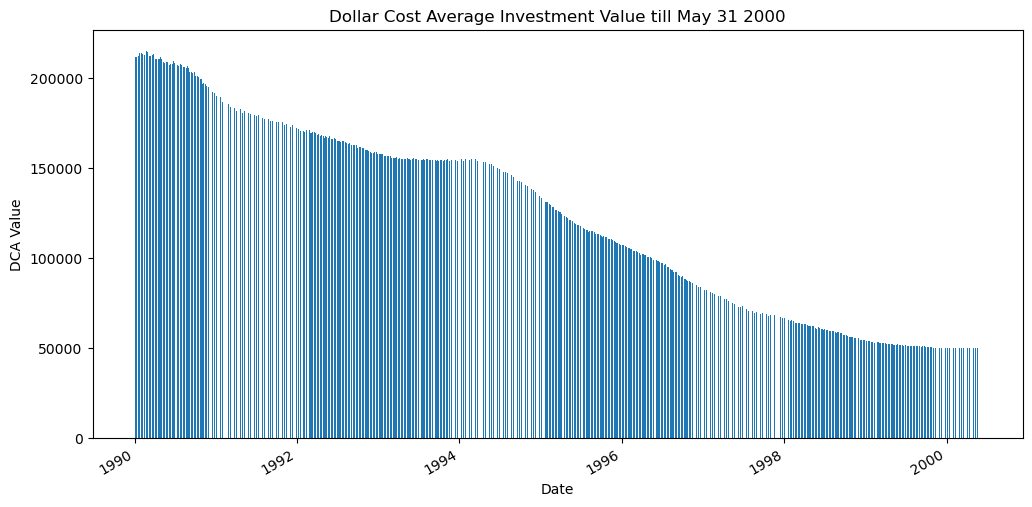

In [7]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.bar(adj_close_prices.index, dca)
plt.xlabel('Date')
plt.ylabel('DCA Value')
plt.title(f'Dollar Cost Average Investment Value till {final_day}')

# Rotate x-axis labels for better visibility
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

### Volatility

In [8]:
#Get the volatility
lump_sum_vol = lump_sum.pct_change().std() * 252 ** 0.5
dca_vol = dca.pct_change().std() * 252 ** 0.5
print('Lump Sum Volatility:', lump_sum_vol*100, '%')
print('DCA Volatility:', dca_vol*100, '%')

Lump Sum Volatility: 14.784181688027436 %
DCA Volatility: 4.428883333970773 %


### Difference between the two strategies

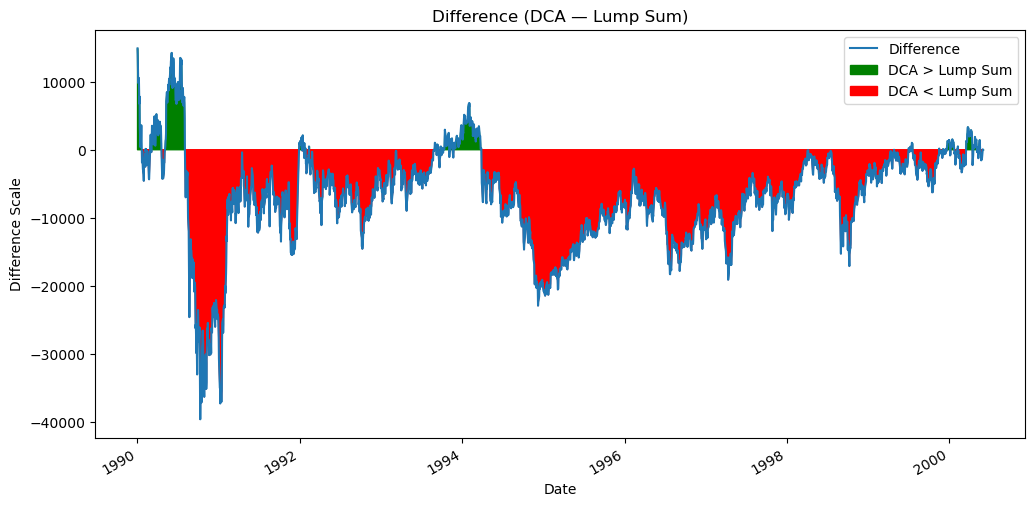

In [9]:
#Get the difference 
difference = dca - lump_sum

#plot the difference
difference.plot(figsize = (12,6), label = 'Difference')
plt.ylabel('Difference Scale')
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'green', where = difference>0, label ='DCA > Lump Sum')
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'red', where = difference<0, label ='DCA < Lump Sum') 
plt.title('Difference (DCA — Lump Sum)')
plt.legend()

### Win Percentages

In [10]:
#Calculate the win percentages
lump_sum_win_percentage = round( sum(difference<0) / len(difference) * 100, 1 )
dca_win_percentage = round( sum(difference>0) / len(difference) * 100, 1 )

print('Lump Sum investment strategy returned more than DCA: '+str(lump_sum_win_percentage)+'% of the time.')
print('DCA returned more than Lump Sum: '+str(dca_win_percentage)+'% of the time.')

Lump Sum investment strategy returned more than DCA: 87.4% of the time.
DCA returned more than Lump Sum: 12.6% of the time.
